# **Total Run Prediction of Teams in Inning 2**
---

## **Importing libraries and setting up the data repository :**

In [290]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [291]:
df = pd.read_csv('../csv_files/match_summary.csv',index_col=0)
pd.set_option('display.max_columns', None)

The 'match_summary.csv' file has been generated and included in the repository. You can find the code for creating this file in the 'match_summary_csv_creation.ipynb' notebook.

## **Exploratory Data Analysis (EDA)**

In [292]:
df.shape

(64, 6)

In [293]:
df.head(20)

,venue_x,innings,batting_team,bowling_team,total_runs_per_inning_match,Total_Overs_Played
0,"Narendra Modi Stadium, Ahmedabad",1,England,New Zealand,282,50.000000
1,"Narendra Modi Stadium, Ahmedabad",2,New Zealand,England,283,36.333333
2,"Rajiv Gandhi International Stadium, Uppal, Hyd...",1,Pakistan,Netherlands,286,48.833333
3,"Rajiv Gandhi International Stadium, Uppal, Hyd...",2,Netherlands,Pakistan,205,41.000000
4,"Himachal Pradesh Cricket Association Stadium, ...",1,Afghanistan,Bangladesh,156,37.333333
5,"Himachal Pradesh Cricket Association Stadium, ...",2,Bangladesh,Afghanistan,158,34.666667
6,"Arun Jaitley Stadium, Delhi",1,South Africa,Sri Lanka,428,50.000000
7,"Arun Jaitley Stadium, Delhi",2,Sri Lanka,South Africa,326,44.833333
8,"MA Chidambaram Stadium, Chepauk, Chennai",1,Australia,India,199,49.500000
9,"MA Chidambaram Stadium, Chepauk, Chennai",2,India,Australia,201,41.333333


In [294]:
df.columns

Index(['venue_x', 'innings', 'batting_team', 'bowling_team',
       'total_runs_per_inning_match', 'Total_Overs_Played'],
      dtype='object')

In [295]:
df.dtypes

venue_x                         object
innings                          int64
batting_team                    object
bowling_team                    object
total_runs_per_inning_match      int64
Total_Overs_Played             float64
dtype: object

In the dataset, the columns 'venue_x,' 'batting_team,' and 'bowling_team' are categorical, meaning they represent different categories or labels. On the other hand, 'total_runs_per_inning_match,' 'innings,' and 'Total_Overs_Played' are numerical columns, containing quantitative information.\
Specifically, 'total_runs_per_inning_match' signifies the runs scored by a batting team in a particular match. Given that each match has two innings, this column records the total_runs for each team in their respective rows.

In [296]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   venue_x                      64 non-null     object 
 1   innings                      64 non-null     int64  
 2   batting_team                 64 non-null     object 
 3   bowling_team                 64 non-null     object 
 4   total_runs_per_inning_match  64 non-null     int64  
 5   Total_Overs_Played           64 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.5+ KB


The describe() function which provides basic statistics about the numeric attributes in the DataFrame. It includes metrics like count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.

In [297]:
df.describe()

,innings,total_runs_per_inning_match,Total_Overs_Played
count,64.000000,64.000000,64.000000
mean,1.500000,255.234375,44.028646
std,0.503953,75.345710,7.403736
min,1.000000,90.000000,21.000000
25%,1.000000,204.750000,40.958333
50%,1.500000,252.000000,47.000000
75%,2.000000,286.500000,50.000000
max,2.000000,428.000000,50.000000


In [298]:
def print_unique_values(df, categorical_columns):
  for col in categorical_columns:
      print(f'{col}: {df[col].unique()}')

In [299]:
categorical_columns = ['venue_x','batting_team','bowling_team']
print_unique_values(df,categorical_columns)

venue_x: ['Narendra Modi Stadium, Ahmedabad'
 'Rajiv Gandhi International Stadium, Uppal, Hyderabad'
 'Himachal Pradesh Cricket Association Stadium, Dharamsala'
 'Arun Jaitley Stadium, Delhi' 'MA Chidambaram Stadium, Chepauk, Chennai'
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow'
 'Maharashtra Cricket Association Stadium, Pune'
 'M Chinnaswamy Stadium, Bengaluru' 'Wankhede Stadium, Mumbai'
 'Eden Gardens, Kolkata']
batting_team: ['England' 'New Zealand' 'Pakistan' 'Netherlands' 'Afghanistan'
 'Bangladesh' 'South Africa' 'Sri Lanka' 'Australia' 'India']
bowling_team: ['New Zealand' 'England' 'Netherlands' 'Pakistan' 'Bangladesh'
 'Afghanistan' 'Sri Lanka' 'South Africa' 'India' 'Australia']


Batting_team and bowling_team are permutations of teams participating in Worldcup 2023. 

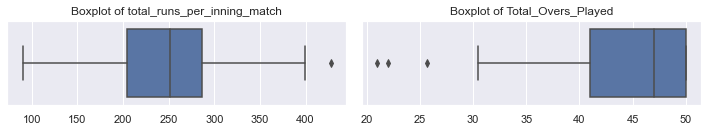

In [300]:
# --------------------------------------------------------------------------------------
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(1, 2, figsize=(10, 2))

axes = axes.flatten()

numeric_columns = ['total_runs_per_inning_match','Total_Overs_Played']

for ax, col in zip(axes, numeric_columns):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

C:\Users\nancy\AppData\Local\Temp\ipykernel_32780\1824817326.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


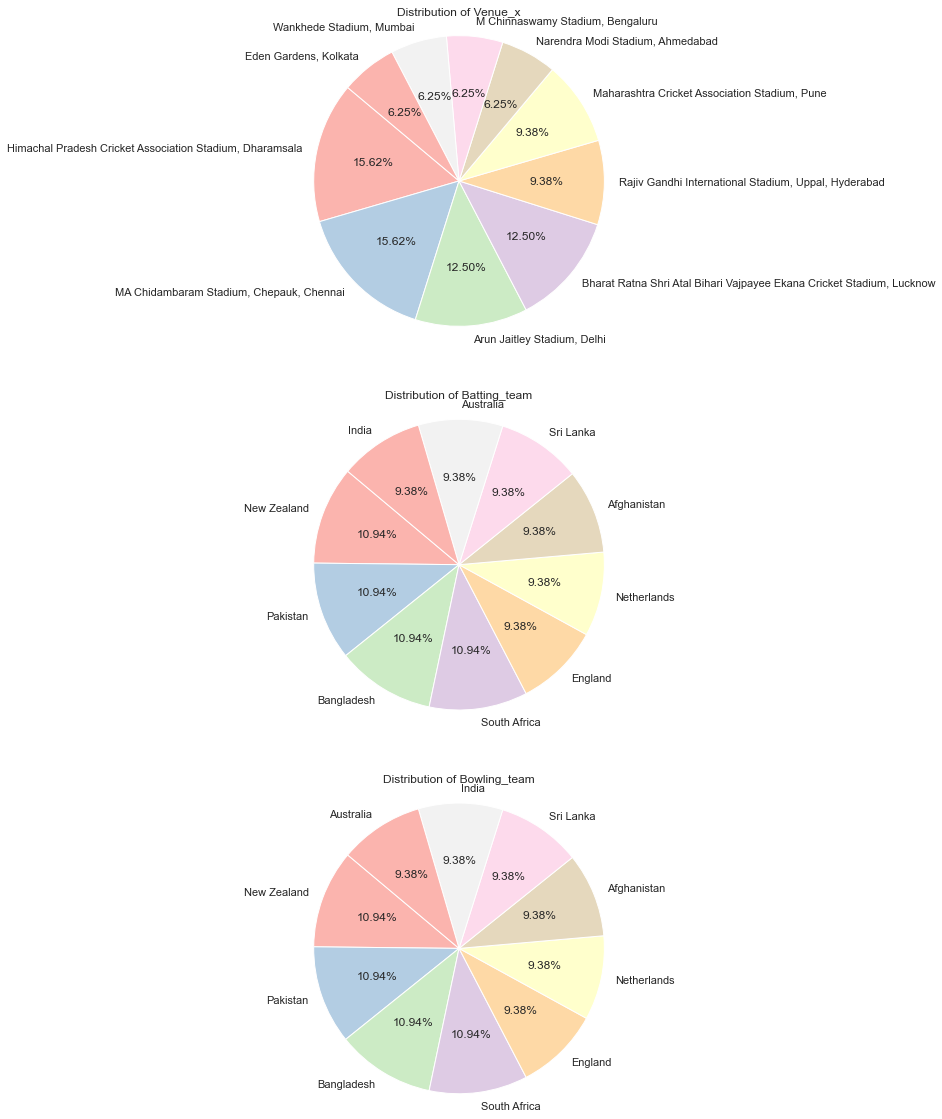

In [301]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(3, 1, figsize=(7, 20))

color_palette = sns.color_palette('Pastel1')

axes = axes.flatten()

for idx, feature in enumerate(categorical_columns):
    feature_counts = df[feature].value_counts()
    labels = feature_counts.index
    sizes = feature_counts.values
    colors = color_palette[:len(labels)]

    ax = axes[idx]

    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
    ax.set_title(f'Distribution of {feature.capitalize()}')
    ax.axis('equal')

for i in range(len(categorical_columns), 2):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

The pie chart shows that some stadiums have hosted more matches, while others have had fewer matches.

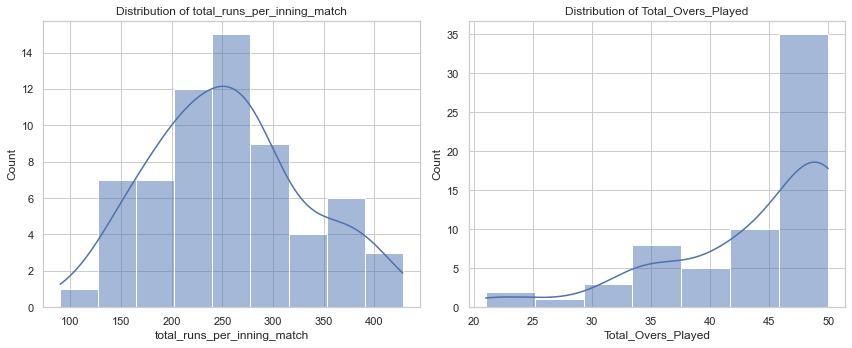

In [302]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['total_runs_per_inning_match'], kde=True)
plt.title('Distribution of total_runs_per_inning_match')

plt.subplot(1, 2, 2)
sns.histplot(df['Total_Overs_Played'], kde=True)
plt.title('Distribution of Total_Overs_Played')

plt.tight_layout()
plt.show()

This distribution shows the density of 'total_runs_per_inning_match' and 'Total_overs'. It shows that 'total_runs_per_inning_matcxh' is uniformly distributed. while 'Total_overs' is negative skewed which seem to be obvios and match with real world situation 

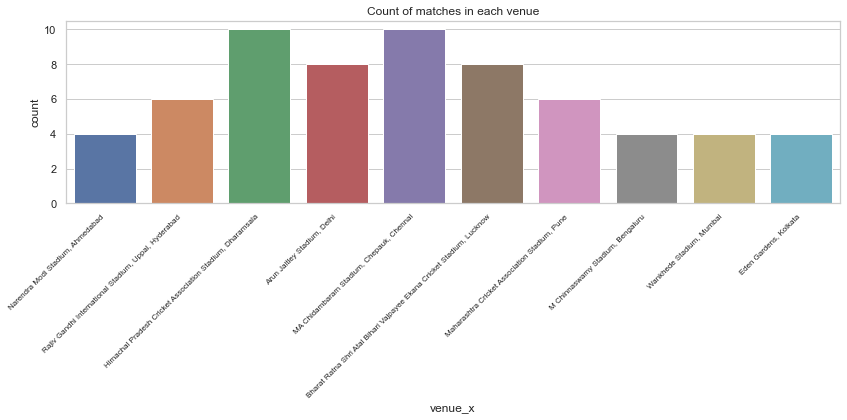

In [303]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue_x', data=df)
plt.title('Count of matches in each venue')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

The plot illustrates that the highest number of matches were held at Himachal Pradesh Cricket Association Stadium, Dharamshala, and MA Chidambaram Stadium, Chennai.

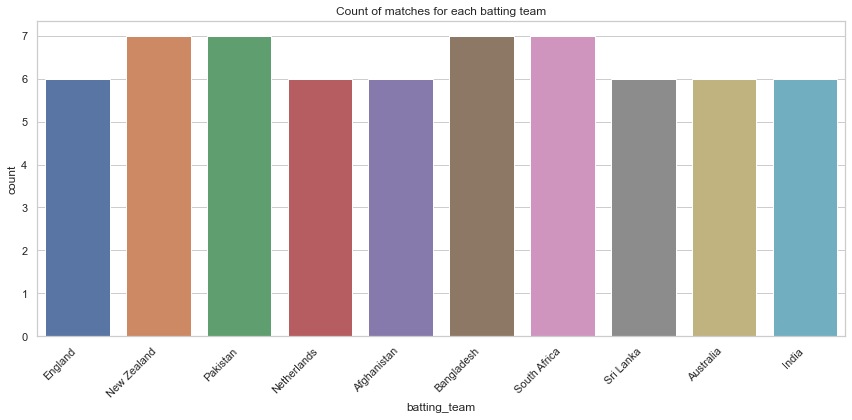

In [304]:
plt.figure(figsize=(12,6))
sns.countplot(x='batting_team', data=df)
plt.title('Count of matches for each batting team')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [305]:
mean_runs_per_team = df.groupby('batting_team')['total_runs_per_inning_match'].mean()
print(mean_runs_per_team)

batting_team
Afghanistan     229.833333
Australia       290.833333
Bangladesh      209.285714
England         219.333333
India           238.333333
Netherlands     209.000000
New Zealand     280.571429
Pakistan        269.142857
South Africa    336.428571
Sri Lanka       257.166667
Name: total_runs_per_inning_match, dtype: float64


The mean runs per inning match vary among different batting teams, with South Africa having the highest average (336.43) and Bangladesh having a relatively lower average (209.29). This indicates differences in the scoring consistency or performance levels among the teams.

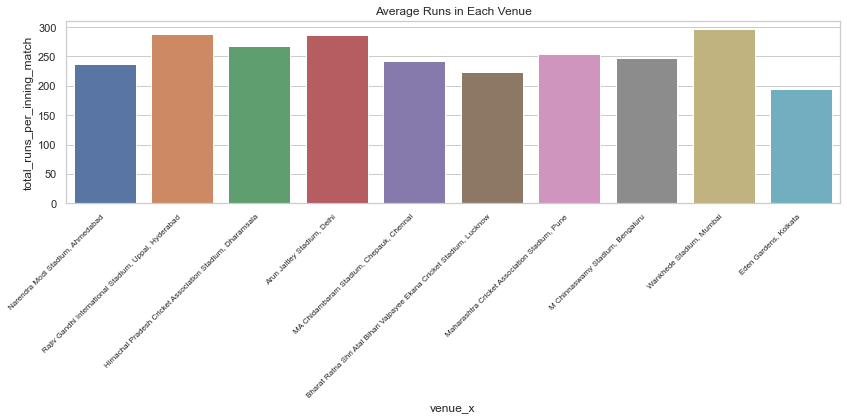

In [306]:
plt.figure(figsize=(12, 6))
sns.barplot(x='venue_x', y='total_runs_per_inning_match', data=df, ci=None)
plt.title('Average Runs in Each Venue')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

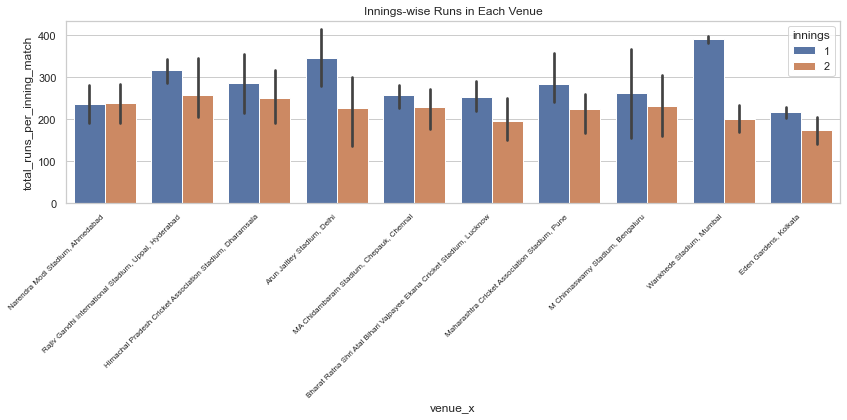

In [307]:
plt.figure(figsize=(12, 6))
sns.barplot(x='venue_x', y='total_runs_per_inning_match', hue='innings', data=df)
plt.title('Innings-wise Runs in Each Venue')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

This bar plot shows how many runs were scored in each match at different cricket venues, separated by the first and second innings. It helps us understand how teams perform in terms of scoring at specific locations during a cricket match.

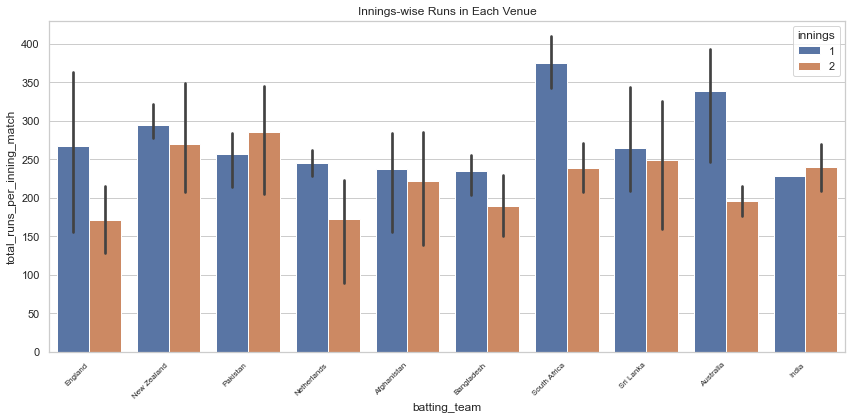

In [308]:
plt.figure(figsize=(12, 6))
sns.barplot(x='batting_team', y='total_runs_per_inning_match', hue='innings', data=df)
plt.title('Innings-wise Runs in Each Venue')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

In [309]:
venue_avg_runs = df.groupby('venue_x')['total_runs_per_inning_match'].mean().sort_values(ascending=False)
print(venue_avg_runs)

venue_x
Wankhede Stadium, Mumbai                                                 296.000
Rajiv Gandhi International Stadium, Uppal, Hyderabad                     287.500
Arun Jaitley Stadium, Delhi                                              285.875
Himachal Pradesh Cricket Association Stadium, Dharamsala                 267.500
Maharashtra Cricket Association Stadium, Pune                            254.000
M Chinnaswamy Stadium, Bengaluru                                         247.000
MA Chidambaram Stadium, Chepauk, Chennai                                 242.900
Narendra Modi Stadium, Ahmedabad                                         237.000
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow    224.375
Eden Gardens, Kolkata                                                    195.000
Name: total_runs_per_inning_match, dtype: float64


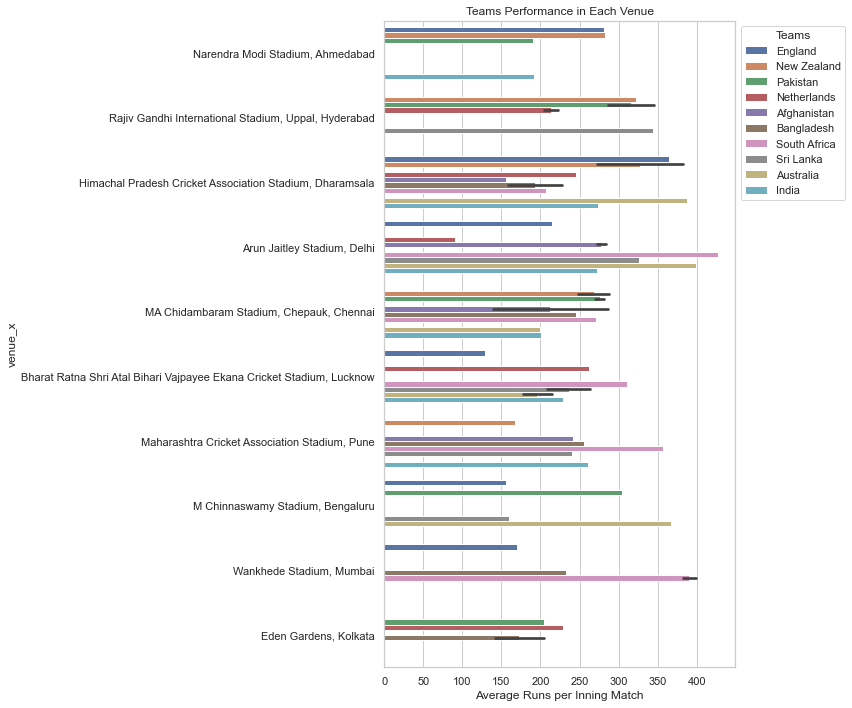

In [310]:
plt.figure(figsize=(12, 10))
sns.barplot(x='total_runs_per_inning_match', y='venue_x', hue='batting_team', data=df)
plt.title('Teams Performance in Each Venue')
plt.xlabel('Average Runs per Inning Match')
plt.legend(title='Teams', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


This bar plot illustrates the performance of different cricket teams in various venues, showcasing the total runs scored per inning match. Each bar represents a specific venue, and the colors distinguish different teams. It provides a visual comparison of how teams have performed in terms of total runs at different locations.

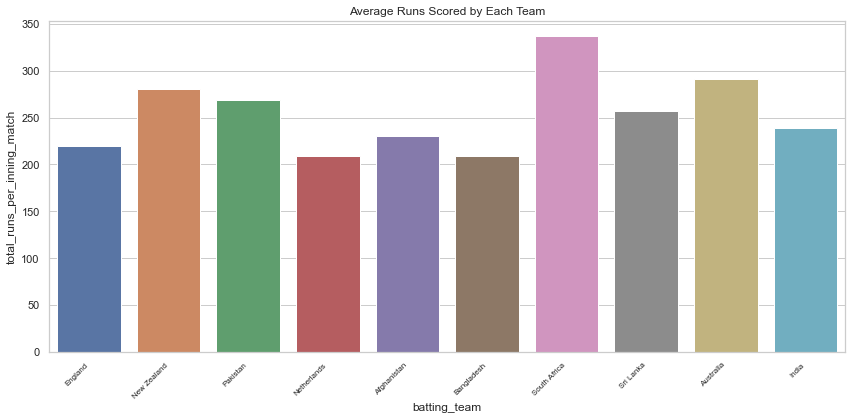

In [311]:
plt.figure(figsize=(12, 6))
sns.barplot(x='batting_team', y='total_runs_per_inning_match', data=df, ci=None)
plt.title('Average Runs Scored by Each Team')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

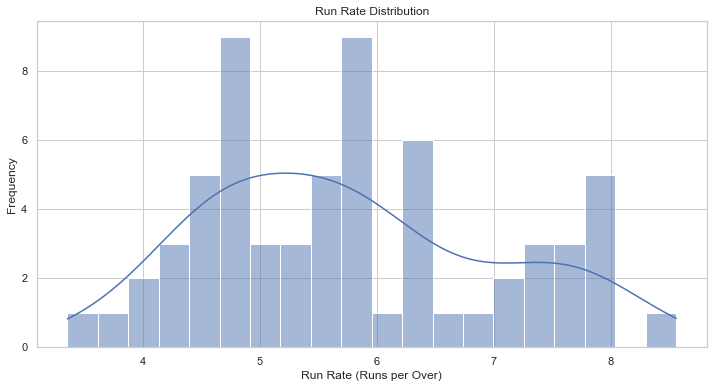

In [312]:
# Calculate run rate for each match
run_rate = df['total_runs_per_inning_match'] / df['Total_Overs_Played']

# Visualize run rate distribution
plt.figure(figsize=(12, 6))
sns.histplot(run_rate, bins=20, kde=True)
plt.title('Run Rate Distribution')
plt.xlabel('Run Rate (Runs per Over)')
plt.ylabel('Frequency')
plt.show()


This histogram displays the distribution of run rates in cricket matches, indicating the frequency of runs scored per over. The bins represent different ranges of run rates.

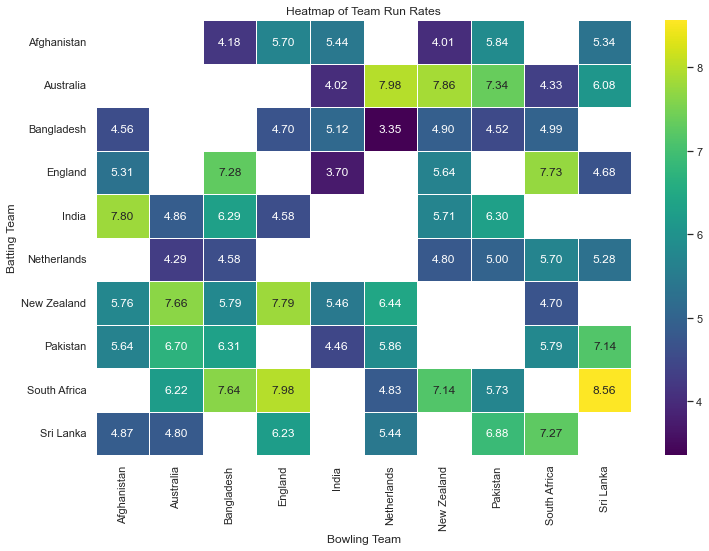

In [313]:
team_metrics = df.groupby(['venue_x', 'innings', 'batting_team', 'bowling_team']).agg({
    'total_runs_per_inning_match': 'sum',
    'Total_Overs_Played': 'sum'
}).reset_index()

team_metrics['run_rate'] = team_metrics['total_runs_per_inning_match'] / team_metrics['Total_Overs_Played']

heatmap_data1 = team_metrics.pivot_table(index='batting_team', columns='bowling_team', values='run_rate')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data1, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Team Run Rates')
plt.xlabel('Bowling Team')
plt.ylabel('Batting Team')
plt.show()


This map shows how different teams perform against each other in terms of run rates. Each cell in the heatmap corresponds to a particular match between a batting team and a bowling team, showcasing the run rate achieved by the batting team against the particular bowling team. Bright colors in the map indicate higher run rates, which helps in comparing the performance between various team.

### **Analysis of Second Inning Performances in Matches**

Now, we filter the matches for second inning. 

In [314]:
df = df[df['innings'] == 2]

In [315]:
df = df.reset_index(drop=True)

In [316]:
df.head(40)

,venue_x,innings,batting_team,bowling_team,total_runs_per_inning_match,Total_Overs_Played
0,"Narendra Modi Stadium, Ahmedabad",2,New Zealand,England,283,36.333333
1,"Rajiv Gandhi International Stadium, Uppal, Hyd...",2,Netherlands,Pakistan,205,41.000000
2,"Himachal Pradesh Cricket Association Stadium, ...",2,Bangladesh,Afghanistan,158,34.666667
3,"Arun Jaitley Stadium, Delhi",2,Sri Lanka,South Africa,326,44.833333
4,"MA Chidambaram Stadium, Chepauk, Chennai",2,India,Australia,201,41.333333
5,"Rajiv Gandhi International Stadium, Uppal, Hyd...",2,Netherlands,New Zealand,223,46.500000
6,"Himachal Pradesh Cricket Association Stadium, ...",2,Bangladesh,England,227,48.333333
7,"Rajiv Gandhi International Stadium, Uppal, Hyd...",2,Pakistan,Sri Lanka,345,48.333333
8,"Arun Jaitley Stadium, Delhi",2,India,Afghanistan,273,35.000000
9,"MA Chidambaram Stadium, Chepauk, Chennai",2,New Zealand,Bangladesh,248,42.833333


This dataframe only includes entries for the second inning in different matches.\
Then we drop the column of 'innings' since we have filtered it.

In [317]:
df = df.drop(['innings'],axis='columns')

In [318]:
df.shape

(32, 5)

After filtering, we get 32 columns which aligns with the data of 32 ODIs.

In [319]:
df.describe()

,total_runs_per_inning_match,Total_Overs_Played
count,32.00000,32.000000
mean,225.46875,39.979167
std,66.14158,7.837708
min,90.00000,21.000000
25%,175.25000,34.958333
50%,219.00000,41.416667
75%,271.50000,46.541667
max,383.00000,50.000000


In [320]:
df.isnull().sum()

venue_x                        0
batting_team                   0
bowling_team                   0
total_runs_per_inning_match    0
Total_Overs_Played             0
dtype: int64

In [321]:
df.nunique()

venue_x                        10
batting_team                   10
bowling_team                   10
total_runs_per_inning_match    30
Total_Overs_Played             28
dtype: int64

#### Label Encoding :

In [322]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [323]:
mapping = {}

for column in categorical_columns:
    df[column] = le.fit_transform(df[column])
    mapping[column] = dict(zip(le.classes_, le.transform(le.classes_)))

In [324]:
for column_name in categorical_columns:
    print(f'Mapping for column "{column_name}":')
    for key, value in mapping[column_name].items():
        print(f'{key}: {value}')
    print()


Mapping for column "venue_x":
Arun Jaitley Stadium, Delhi: 0
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow: 1
Eden Gardens, Kolkata: 2
Himachal Pradesh Cricket Association Stadium, Dharamsala: 3
M Chinnaswamy Stadium, Bengaluru: 4
MA Chidambaram Stadium, Chepauk, Chennai: 5
Maharashtra Cricket Association Stadium, Pune: 6
Narendra Modi Stadium, Ahmedabad: 7
Rajiv Gandhi International Stadium, Uppal, Hyderabad: 8
Wankhede Stadium, Mumbai: 9

Mapping for column "batting_team":
Afghanistan: 0
Australia: 1
Bangladesh: 2
England: 3
India: 4
Netherlands: 5
New Zealand: 6
Pakistan: 7
South Africa: 8
Sri Lanka: 9

Mapping for column "bowling_team":
Afghanistan: 0
Australia: 1
Bangladesh: 2
England: 3
India: 4
Netherlands: 5
New Zealand: 6
Pakistan: 7
South Africa: 8
Sri Lanka: 9



### **Model Tarining and Testing :**

In [325]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor


In [326]:
X = df[['batting_team','bowling_team','venue_x','Total_Overs_Played']]
y = df['total_runs_per_inning_match']

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle=True)

In [328]:
print(X_test)

    batting_team  bowling_team  venue_x  Total_Overs_Played
23             5             1        0           21.000000
10             4             7        7           30.500000
9              6             2        5           42.833333
7              7             9        8           48.333333
22             2             8        9           46.666667
29             0             9        6           45.333333
20             0             7        5           49.000000


In [329]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((25, 4), (7, 4))

In [330]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}},
    'PolynomialFeatures': {"model": make_pipeline(PolynomialFeatures(), LinearRegression()),
                      "params": {'polynomialfeatures__degree': [2,3]}}
}


In [331]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, y_train)
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
        train_mae = mean_absolute_error(y_train, y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
        test_mae = mean_absolute_error(y_test, y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_reg_model_ours)
    y_predicted = best_reg_model_ours.predict(X_test_scaled)

    return model_results,best_reg_model_ours

In [332]:
model_results,best_reg_model_ours = eval_models()
model_results

LinearRegression 43.237916377451846 {}
RandomForestRegressor 40.25419803983548 {'max_depth': 1, 'n_estimators': 5}


XGBRegressor 44.66847473811558 {'learning_rate': 0.001, 'n_estimators': 510}
PolynomialFeatures 2.817622255723502e-13 {'polynomialfeatures__degree': 3}
Best model:  RandomForestRegressor(max_depth=1, n_estimators=5, random_state=42)


,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,43.237916,50.761323,37.170038,43.890565,{}
RandomForestRegressor,40.254198,49.535073,32.700168,36.955187,"{'max_depth': 1, 'n_estimators': 5}"
XGBRegressor,44.668475,68.015355,34.761871,54.255397,"{'learning_rate': 0.001, 'n_estimators': 510}"
PolynomialFeatures,0.0,226.044913,0.0,177.388237,{'polynomialfeatures__degree': 3}


In [333]:
print(best_reg_model_ours)

RandomForestRegressor(max_depth=1, n_estimators=5, random_state=42)


In [334]:
y_predicted = best_reg_model_ours.predict(X_test_scaled)

In [335]:
print(y_predicted)

[194.27679739 194.27679739 231.40993464 279.13691877 258.67956583
 258.67956583 258.67956583]


In [336]:
classifier=best_reg_model_ours
classifier.fit(X_train,y_train)

RandomForestRegressor(max_depth=1, n_estimators=5, random_state=42)

In [337]:
import pickle
pickle_out = open("../pickle_files/runs_inning_2.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()